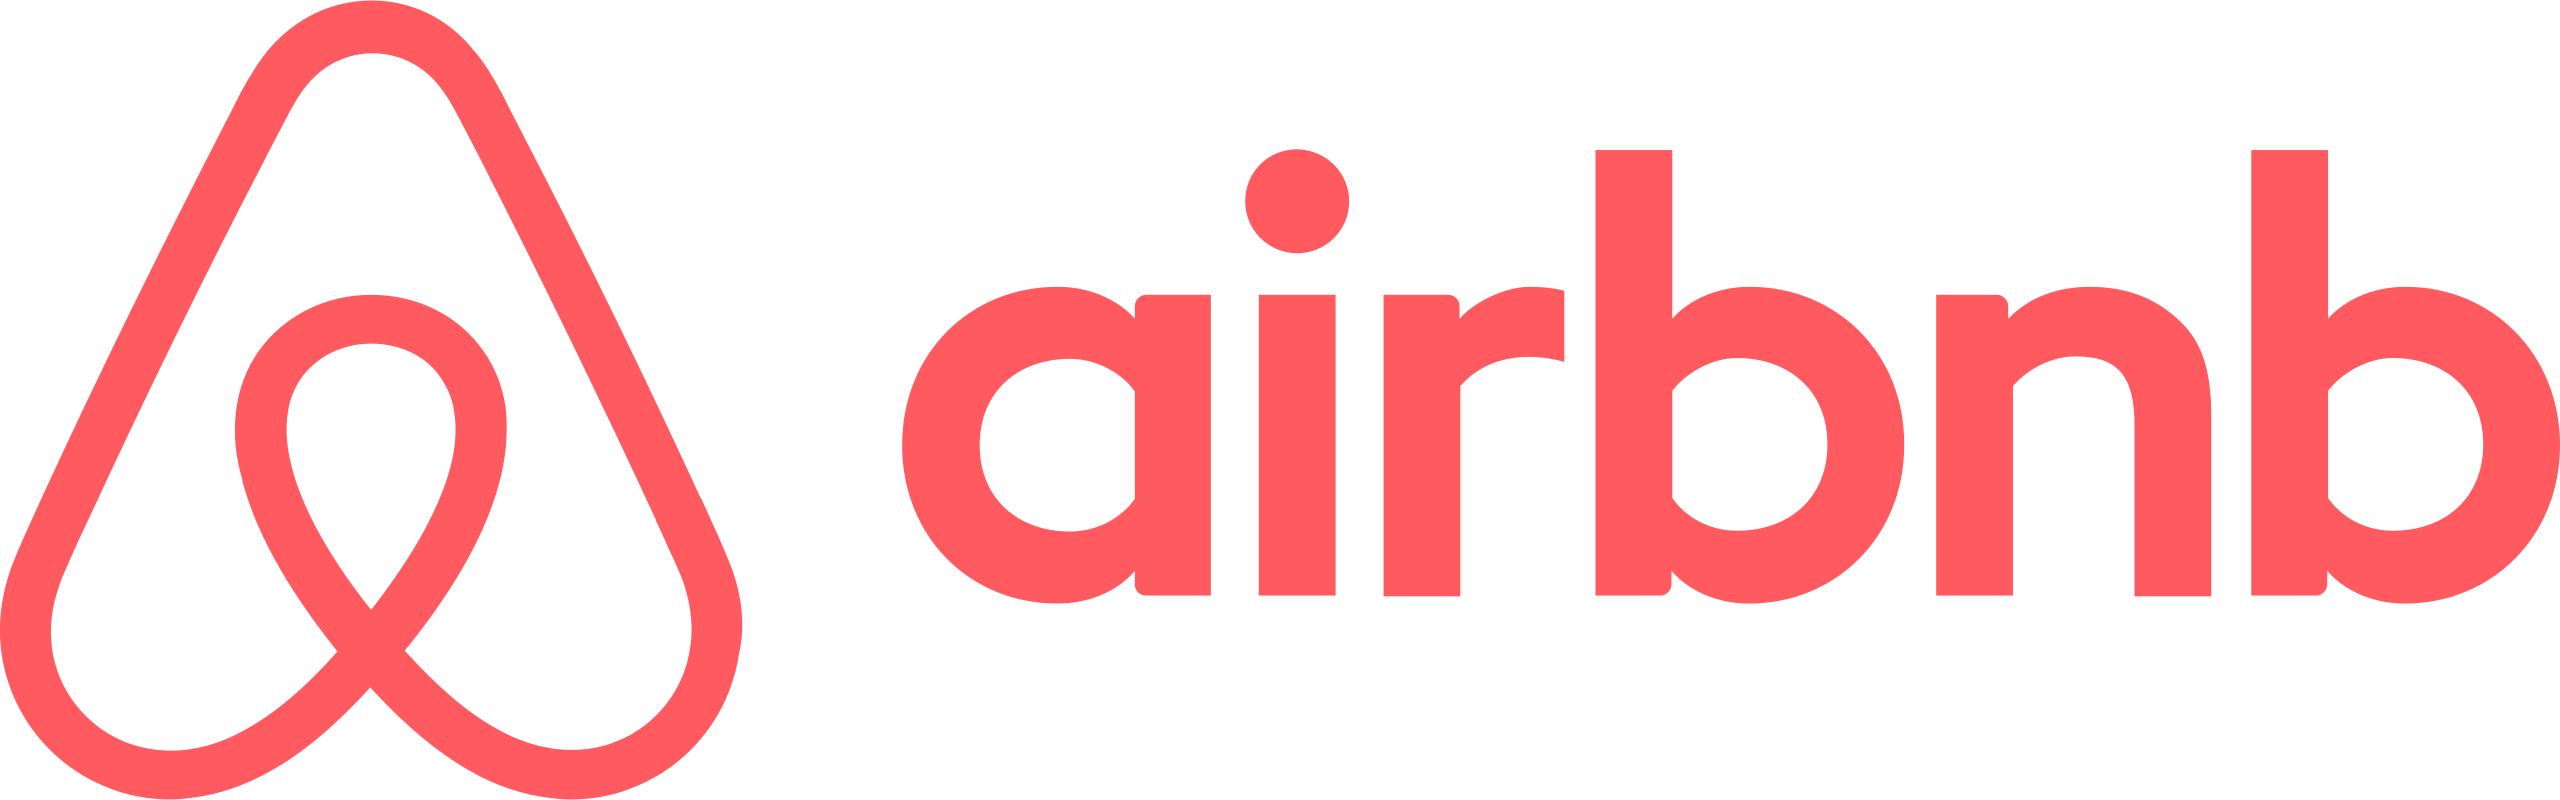

# Data Cleaning Notebook

Notebook: 1 of 4



--------



### Author: Will Sanzone
### Email: wsanzoneds@gmail.com

## Introduction

The purpose of this notebook is as follows:

1. input a file into the `file` variable into the second cell below
2. Modify the filename in the last cell of the workbook to be the output name that you would like
3. Run the entire notebook to output a clean `.csv` file for encoding and pre-processing

This data was sourced from Inside Airbnb, a link to the data files used can be found here: http://insideairbnb.com/get-the-data. The files that I downloaded for this project are all titled `listings.csv.gz`. **You will have to download the file and unzip it for this notebook to work.**

-----

Note: you will have to scroll down to the "New York City, New York, United States" section and click the link titled "show archived data."

The data sourced from Inside Airbnb has 74 features, a data dictionary for these variables can be found here: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596

## Importing Libraries & Reading In Files

We will be importing the standard data science libraries, along with BeautifulSoup, requests, re, urllib, and time.

In [1]:
# The holy triad of data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Other additional libraries
import seaborn as sns
pd.set_option('display.max_columns', None)
import requests
from bs4 import BeautifulSoup
import re
import urllib
import time

/Users/williamsanzone/opt/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now we can read in our file. **Note:** The filename will change based on what city and time region you want to scrape from. If you change the filename in the below cell, be sure to change it in the final cell of the notebook as well so the output file naming convention stays the same.

In [2]:
# READ IN ONE FILE AT A TIME AND RUN NOTEBOOK TO CLEAN EACH FILE
file = 'raw_data/nyc_sept2021.csv'
df = pd.read_csv(file)
df.shape

(36923, 74)

Our dataset has 37,410 rows and 74 columns. We can take a look at the first few rows of the DataFrame with the `head()` call.

In [3]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210901220703,2021-09-02,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,a few days or more,34%,19%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,5,35,65,340,2021-09-02,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20210901220703,2021-09-02,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,86%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",$76.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,4,9,208,2021-09-02,408,58,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.03


We can also look at random rows of the DataFrame with the `sample()` method.

In [4]:
df.sample(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
70,31130,https://www.airbnb.com/rooms/31130,20210901220703,2021-09-02,Most Central Location!,The bedroom is set up completely for you. Seco...,"Central Park, TimeWarner center on Columbus Ci...",https://a0.muscache.com/pictures/32ad29f2-419b...,117287,https://www.airbnb.com/users/show/117287,Larissa Nicole,2010-05-02,"New York, New York, United States",I lived in different parts of America and trav...,within an hour,100%,86%,t,https://a0.muscache.com/im/pictures/user/6f7cf...,https://a0.muscache.com/im/pictures/user/6f7cf...,Hell's Kitchen,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"New York, United States",Hell's Kitchen,Manhattan,40.76720,-73.98464,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Free street parking"", ""Heating"", ""Dedicated ...",$130.00,1,120,1.0,30.0,90.0,120.0,8.2,112.5,NaN,t,18,48,78,353,2021-09-02,66,0,0,2018-12-15,2020-06-02,4.86,4.82,4.90,4.95,4.95,5.00,4.82,NaN,f,4,1,3,0,1.99
11791,16581779,https://www.airbnb.com/rooms/16581779,20210901220703,2021-09-02,2BR w/private courtyard BStuy:40% monthly disc...,Taking all precautions in wake of the Coronavi...,The building is within walking distance to fin...,https://a0.muscache.com/pictures/f783185d-8838...,109306113,https://www.airbnb.com/users/show/109306113,Chad,2017-01-01,"New York, New York, United States","First and foremost, greetings to the entire Ai...",a few days or more,25%,0%,f,https://a0.muscache.com/im/pictures/user/fd6cd...,https://a0.muscache.com/im/pictures/user/fd6cd...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68497,-73.92660,Entire townhouse,Entire home/apt,5,NaN,1 bath,2.0,4.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Wash...",$299.00,30,180,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,27,57,87,177,2021-09-02,67,0,0,2018-09-27,2020-03-08,4.82,4.77,4.59,4.85,4.82,4.83,4.77,NaN,f,1,1,0,0,1.88


To get information about our variables and their datatypes, we can use the `info()` command.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  int64  
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

**From the above cell we can observe the following:**

- Several columns have null values
- `last_scraped` and `calendar_last_scraped` could be in the datetime format
- Seems like some columns are of the `object` type that could be booleans or converted to binary numeric values
- `first_review` and `last_review` should also be in the datetime format
- `bathrooms_text` will need to be converted to a numeric type and have the text removed


## Data Cleaning

Let's look for duplicates:

In [6]:
df.duplicated().sum()

0

That is good, there are already no duplicates in the dataset. Someone from InsideAirbnb must have already done this.

-----

We can convert the date values to the `datetime` datatype by using the built in Pandas method:

In [7]:
# Converts the values to a datetime format
df['last_scraped'] = pd.to_datetime(df.last_scraped)
df['calendar_last_scraped'] = pd.to_datetime(df.calendar_last_scraped)
df['first_review'] = pd.to_datetime(df.first_review)
df['last_review'] = pd.to_datetime(df.last_review)

# Sanity check to make sure that our changes were implemented
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            36923 non-null  int64         
 1   listing_url                                   36923 non-null  object        
 2   scrape_id                                     36923 non-null  int64         
 3   last_scraped                                  36923 non-null  datetime64[ns]
 4   name                                          36910 non-null  object        
 5   description                                   35710 non-null  object        
 6   neighborhood_overview                         22510 non-null  object        
 7   picture_url                                   36923 non-null  object        
 8   host_id                                       36923 non-null  int6

Now we have all of our relevant date fields in the correct format.

The following variables should be binary 1's and 0's (where "t" is a 1, and "f" is a 0):

- `host_is_superhost`
- `host_has_profile_pic`
- `host_identity_verified`
- `has_availability`
- `instant_bookable`

We can do this by using the `.map` method from the `pandas` library:

In [8]:
# Using .map to put true values as a 1 and false values as a 0
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['has_availability'] = df['has_availability'].map({'t': 1, 'f': 0})
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})

Let's double check to make sure that this has been executed correctly.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            36923 non-null  int64         
 1   listing_url                                   36923 non-null  object        
 2   scrape_id                                     36923 non-null  int64         
 3   last_scraped                                  36923 non-null  datetime64[ns]
 4   name                                          36910 non-null  object        
 5   description                                   35710 non-null  object        
 6   neighborhood_overview                         22510 non-null  object        
 7   picture_url                                   36923 non-null  object        
 8   host_id                                       36923 non-null  int6

We have a number of columns that will not be useful in our analysis. Before doing the rest of the cleaning, we will remove them.

In [10]:
# Identifying columns to remove
remove_list = ['scrape_id', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'neighbourhood', 'bathrooms',
              'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'minimum_maximum_nights', 
              'maximum_maximum_nights', 'calendar_updated', 'license', 'calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']

# Actually removing the columns
df = df.drop(columns = remove_list)

# Checking to make sure this has worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              36923 non-null  int64         
 1   listing_url                     36923 non-null  object        
 2   last_scraped                    36923 non-null  datetime64[ns]
 3   name                            36910 non-null  object        
 4   description                     35710 non-null  object        
 5   neighborhood_overview           22510 non-null  object        
 6   picture_url                     36923 non-null  object        
 7   host_id                         36923 non-null  int64         
 8   host_url                        36923 non-null  object        
 9   host_name                       36812 non-null  object        
 10  host_since                      36812 non-null  object        
 11  ho

Now let's see what we can do about the null values. The steps we will follow are:

- Look at all columns with missing values using `isna().sum()`
- go through each column and determine what to do with the null values. The options are as follows:
    - impute nulls
    - set nulls to zero or some other value
    - drop rows that contain null values
- put all of the clean columns into a new dataframe for use

In [11]:
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                 13
description                        1213
neighborhood_overview             14413
picture_url                           0
host_id                               0
host_url                              0
host_name                           111
host_since                          111
host_location                       209
host_about                        15287
host_response_time                15743
host_response_rate                15743
host_acceptance_rate              15102
host_is_superhost                   111
host_neighbourhood                 7197
host_total_listings_count           111
host_verifications                    0
host_has_profile_pic                111
host_identity_verified              111
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Let's make a Dataframe of all the rows that contain at least one `NaN` value

In [12]:
# Finding all rows with at least one NaN value
nan_values = df[df.isna().any(axis=1)] 

In [13]:
nan_values

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,2021-09-02,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,a few days or more,34%,19%,0.0,Midtown,6.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,Midtown,Manhattan,40.753560,-73.985590,Entire rental unit,Entire home/apt,1,1 bath,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$150.00,30,1125,30.0,1125.0,1,5,35,65,340,2021-09-02,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0,3,0.33
2,5121,https://www.airbnb.com/rooms/5121,2021-09-02,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,0.0,Bedford-Stuyvesant,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,1.0,Bedford-Stuyvesant,Brooklyn,40.685350,-73.955120,Private room in rental unit,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",$60.00,30,730,30.0,730.0,1,30,60,90,365,2021-09-02,50,0,0,2014-01-22,2016-06-05,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,1,0.54
3,5136,https://www.airbnb.com/rooms/5136,2021-09-02,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2009-02-03,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",within a day,50%,33%,0.0,Greenwood Heights,1.0,"['email', 'phone', 'reviews']",1.0,1.0,Sunset Park,Brooklyn,40.662650,-73.994540,Entire rental unit,Entire home/apt,4,1.5 baths,2.0,2.0,"[""Dryer"", ""BBQ grill"", ""Kitchen"", ""Long term s...",$275.00,5,1125,5.0,1125.0,1,0,0,0,204,2021-09-02,2,1,1,2014-01-02,2021-08-08,5.00,5.00,5.00,5.00,5.00,4.50,5.00,0,1,0.02
5,5203,https://www.airbnb.com/rooms/5203,2021-09-02,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,MaryEllen,2009-02-05,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,NaN,0.0,Upper West Side,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",1.0,1.0,Upper West Side,Manhattan,40.803800,-73.967510,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,"[""Hot water"", ""Smoke alarm"", ""Paid parking off...",$75.00,2,14,2.0,14.0,1,0,0,0,0,2021-09-02,118,0,0,2010-10-09,2017-07-12,4.91,4.83,4.82,4.97,4.95,4.94,4.92,0,1,0.89
7,6848,https://www.airbnb.com/rooms/6848,2021-09-02,Only 2 stops to 

Let's take a look at rows where the `name` field is missing:

In [14]:
# Finding listings with a missing name field
name_missing = df[df['name'].isna()]

# Displaying these rows
name_missing

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
2129,2232600,https://www.airbnb.com/rooms/2232600,2021-09-02,NaN,NaN,NaN,https://a0.muscache.com/pictures/39659081/a0d2...,11395220,https://www.airbnb.com/users/show/11395220,Anna,2014-01-17,"New York, New York, United States",NaN,NaN,NaN,NaN,0.0,East Village,1.0,"['email', 'phone', 'reviews', 'kba']",1.0,1.0,East Village,Manhattan,40.73192,-73.98819,Entire rental unit,Entire home/apt,2,NaN,NaN,NaN,"[""Kitchen"", ""Smoke alarm"", ""Heating"", ""TV"", ""S...",$200.00,30,365,30.0,365.0,1,9,17,25,279,2021-09-02,28,0,0,2014-06-06,2015-06-08,4.74,4.94,4.65,4.75,4.94,4.88,4.88,0,1,0.32
3351,4209595,https://www.airbnb.com/rooms/4209595,2021-09-02,NaN,NaN,NaN,https://a0.muscache.com/pictures/54205293/aa72...,20700823,https://www.airbnb.com/users/show/20700823,Jesse,2014-08-29,"New York, New York, United States",Hello! We are a kindergarten teacher and a fin...,NaN,NaN,NaN,0.0,Greenwich Village,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Greenwich Village,Manhattan,40.73323,-73.99294,Entire rental unit,Entire home/apt,4,1 bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Heating"", ""Carbon ...",$225.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,1,0,0,2015-01-01,2015-01-01,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,1,0.01
3460,4370230,https://www.airbnb.com/rooms/4370230,2021-09-02,NaN,Beautiful 1BR apartment in the heart of Nolita...,NaN,https://a0.muscache.com/pictures/54891824/e1c7...,22686810,https://www.airbnb.com/users/show/22686810,Michaël,2014-10-18,"Paris, Île-de-France, France",NaN,NaN,NaN,NaN,0.0,Nolita,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Nolita,Manhattan,40.72100,-73.99536,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Heating"", ""Carbon ...",$215.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,5,0,0,2014-11-30,2015-09-27,5.00,5.00,4.80,5.00,4.80,5.00,4.80,0,1,0.06
3636,4581788,https://www.airbnb.com/rooms/4581788,2021-09-06,NaN,NaN,NaN,https://a0.muscache.com/pictures/58399006/d216...,21600904,https://www.airbnb.com/users/show/21600904,Lucie,2014-09-21,"New York, New York, United States",NaN,NaN,NaN,NaN,0.0,NaN,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Williamsburg,Brooklyn,40.71370,-73.94378,Private room in rental unit,Private room,1,2 baths,1.0,1.0,"[""Wifi"", ""Long term stays allowed"", ""Shampoo"",...",$150.00,30,1125,30.0,1125.0,0,0,0,0,0,2021-09-06,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
3821,4756856,https://www.airbnb.com/rooms/4756856,2021-09-02,NaN,"Sunny bedroom in Castlebraid, Bushwick! I shar...",NaN,https://a0.muscache.com/pictures/59707548/6a5f...,1832442,https://www.airbnb.com/users/show/1832442,Carolina,2012-02-29,"New York, New York, United States",My name is Carolina. I´m a peruvian artist bas...,NaN,NaN,NaN,0.0,Bushwick,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Bushwick,Brooklyn,40.69869,-73.92852,Private room in rental unit,Private room,1,2 baths,1.0,1.0,"[""Kitchen"", ""Washer"", ""Gym"", ""Heating"", ""Air c...",$70.

It looks like most of these rows that have the `name` field missing also have the `description` field missing. 

------

We can drop these rows as they will have little impact on our data.


In [15]:
# Querying the original dataframe to only include rows that have values for the name column
df = df[df["name"].str.contains("NaN") == False]

# re-checking our missing values list
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                        1210
neighborhood_overview             14402
picture_url                           0
host_id                               0
host_url                              0
host_name                           111
host_since                          111
host_location                       209
host_about                        15278
host_response_time                15730
host_response_rate                15730
host_acceptance_rate              15090
host_is_superhost                   111
host_neighbourhood                 7193
host_total_listings_count           111
host_verifications                    0
host_has_profile_pic                111
host_identity_verified              111
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Let's look at the `description` column. This is the text that each host provides for their listing:

In [16]:
# Finding rows with missing descriptions
description_missing = df[df['description'].isna()]

# displaying the data
description_missing

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
1631,1550558,https://www.airbnb.com/rooms/1550558,2021-09-02,Williamsburg Gem!,NaN,NaN,https://a0.muscache.com/pictures/bf04a0c4-51fc...,6044644,https://www.airbnb.com/users/show/6044644,Damon,2013-04-22,"New York, New York, United States",artist and chef that loves learning about the ...,within a few hours,100%,56%,1.0,Williamsburg,1.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,Williamsburg,Brooklyn,40.710420,-73.962560,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Kitchen"", ""Washer"", ""Smoke alarm"", ""Heating""...",$182.00,30,150,30.0,150.0,1,1,12,29,29,2021-09-02,32,2,0,2018-05-12,2020-12-14,4.97,4.94,4.61,4.97,5.0,4.97,4.77,0,1,0.79
2131,2237708,https://www.airbnb.com/rooms/2237708,2021-09-02,Spacious 1bdrm furnished wifi tv,NaN,NaN,https://a0.muscache.com/pictures/9904fbdf-be3a...,10778096,https://www.airbnb.com/users/show/10778096,Ajay,2013-12-23,"New York, New York, United States",I am only renting when I am out of town,NaN,NaN,NaN,0.0,NaN,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Financial District,Manhattan,40.705280,-74.007200,Entire rental unit,Entire home/apt,2,NaN,1.0,2.0,"[""Kitchen"", ""Hot water"", ""Washer"", ""Smoke alar...",$300.00,30,1125,30.0,1125.0,0,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
2297,2478933,https://www.airbnb.com/rooms/2478933,2021-09-02,Ambient stylish bedroom with private bathroom,NaN,NaN,https://a0.muscache.com/pictures/52b22860-8aa7...,1761578,https://www.airbnb.com/users/show/1761578,Grant,2012-02-16,"New York, New York, United States",NaN,within an hour,100%,91%,0.0,Corona,3.0,['phone'],1.0,0.0,Rego Park,Queens,40.733920,-73.858750,Private room in rental unit,Private room,2,0 shared baths,1.0,1.0,"[""Hot water"", ""Kitchen"", ""Long term stays allo...",$173.00,2,29,2.0,1125.0,1,23,50,80,170,2021-09-02,1,1,0,2021-07-25,2021-07-25,2.00,2.00,2.00,5.00,2.0,5.00,2.00,0,3,0.75
2359,2592533,https://www.airbnb.com/rooms/2592533,2021-09-02,"Private room in the heart of Williamsburg- L, G",NaN,NaN,https://a0.muscache.com/pictures/075b7d5e-ca1a...,13270449,https://www.airbnb.com/users/show/13270449,Idan,2014-03-18,"Norwalk, Connecticut, United States",NaN,a few days or more,13%,0%,0.0,Williamsburg,1.0,"['email', 'phone', 'reviews']",1.0,0.0,Williamsburg,Brooklyn,40.710010,-73.950320,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Kitchen"", ""Hot tub"", ""Hot water"", ""Smoke ala...",$50.00,30,1125,30.0,1125.0,1,0,15,45,135,2021-09-02,2,0,0,2019-05-12,2019-05-18,5.00,5.00,5.00,5.00,5.0,5.00,5.00,0,1,0.07
2765,3368427,https://www.airbnb.com/rooms/3368427,2021-09-02,Happy big family,NaN,NaN,https://a0.muscache.com/pictures/2215e307-2d92...,4044499,https://www.airbnb.com/users/show/4044499,Alexander,2012-11-02,"Oslo, Oslo, Norway",NaN,NaN,NaN,NaN,0.0,Flatbush,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Flatbush,Brooklyn,40.652430,-73.963560,Private room in rental unit,Private room,2,1 bath,1.0,1.0,"[""Kitchen"", ""Washer"

We want all listings in our dataset to have both a name and a description, so we will also drop these rows from the dataset.

In [17]:
# doing the same as above but now for the description column
df = df[df["description"].str.contains("NaN") == False]

# re-checking to make sure our changes have worked
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13245
picture_url                           0
host_id                               0
host_url                              0
host_name                           110
host_since                          110
host_location                       201
host_about                        14589
host_response_time                15236
host_response_rate                15236
host_acceptance_rate              14574
host_is_superhost                   110
host_neighbourhood                 6759
host_total_listings_count           110
host_verifications                    0
host_has_profile_pic                110
host_identity_verified              110
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Let's look at each column's missing values as a percentage of the total dataset:

In [18]:
df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview             37.100840
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.308123
host_since                         0.308123
host_location                      0.563025
host_about                        40.865546
host_response_time                42.677871
host_response_rate                42.677871
host_acceptance_rate              40.823529
host_is_superhost                  0.308123
host_neighbourhood                18.932773
host_total_listings_count          0.308123
host_verifications                 0.000000
host_has_profile_pic               0.308123
host_identity_verified             0.308123
neighbourhood_cleansed          

Let's keep working through this list with the small percentages. We will figure out what to do with these and then tackle the large percentages of missing values

------

Instead of re-writing the same code each time, we can create a function that will do it with a single call.

In [19]:
'''
MISSING VALUE LOOK FUNCTION:

INPUTS: df, column

Takes the dataframe and the column that you want to see where the missing values are

RETURNS: returns the dataframe aggregated by the missing values for the column specified
'''

def missing_value_look(df, column):
    missing = df[df[column].isna()]
    return missing

In [20]:
missing_value_look(df, 'host_name')

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
632,455801,https://www.airbnb.com/rooms/455801,2021-09-02,"NYC APT- COMFY, WELCOMING STAY! Private rooms",Upper Manhattan 3 bedroom apartment. Minutes w...,The neighborhood is great and safe. yes you wi...,https://a0.muscache.com/pictures/97f13602-83bc...,2265770,https://www.airbnb.com/users/show/2265770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Harlem,Manhattan,40.807050,-73.952020,Entire rental unit,Entire home/apt,7,1 bath,3.0,4.0,"[""Kitchen"", ""Coffee maker"", ""Hot water"", ""Smok...",$264.00,7,29,7.0,1125.0,1,1,1,1,1,2021-09-02,109,0,0,2012-10-23,2018-05-24,4.85,4.81,4.86,4.87,4.86,4.57,4.69,0,3,1.01
1187,895386,https://www.airbnb.com/rooms/895386,2021-09-02,NYC-Cozy Apt! Walk to Columbia Uni & Central P...,"You’ll love our NYC apt bcuz it’s comfy, large...",The neighborhood is great and safe. It's ethni...,https://a0.muscache.com/pictures/c13bfd56-52f6...,2265770,https://www.airbnb.com/users/show/2265770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Harlem,Manhattan,40.805930,-73.952200,Entire rental unit,Entire home/apt,7,1 bath,3.0,4.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$346.00,9,60,8.8,1125.0,1,8,21,51,85,2021-09-02,103,5,1,2015-04-09,2021-08-08,4.75,4.79,4.89,4.90,4.90,4.63,4.63,1,3,1.32
2495,2835711,https://www.airbnb.com/rooms/2835711,2021-09-02,Sunny West Village Apartment on MacDougal Street,NOW WITH HIGH-SPEED WI-FI<br /><br />This ador...,West Village!,https://a0.muscache.com/pictures/71169c1c-0055...,3237504,https://www.airbnb.com/users/show/3237504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Greenwich Village,Manhattan,40.730580,-74.000700,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Dedicated workspace"", ""Essentials"", ""Microwa...",$105.00,30,1125,30.0,1125.0,1,0,6,16,148,2021-09-02,48,4,0,2018-11-24,2021-07-31,4.46,4.63,3.75,4.85,4.92,4.92,4.52,0,1,1.42
3520,4446862,https://www.airbnb.com/rooms/4446862,2021-09-02,Charming Room in Prospect Heights!,Quiet room in three bedroom apt in Prospect He...,This charming Brooklyn neighborhood offers man...,https://a0.muscache.com/pictures/57579076/ace3...,23077718,https://www.airbnb.com/users/show/23077718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Crown Heights,Brooklyn,40.676050,-73.959970,Private room in rental unit,Private room,2,1 bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Heating"", ""TV"", ""C...",$50.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
3830,4763327,https://www.airbnb.com/rooms/4763327,2021-09-02,"Luxurious, best location, spa inc'l","Brand new luxurious boutique building, swimmin...","Quoting from Time Out Magazine: ""Williamsburg ...",https://a0.muscache.com/pictures/59917673/e733...,24576978,https://www.airbnb.com/users/show/24576978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Greenpoint,Brooklyn,40.721190,-73.952790,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Hot tub"", ""Washer"", ""Smoke alarm""...",$195.00,30,1125,30.0,1125.

Since there are only a few rows without a host name, we will impute the `NaN` values with "unknown"

In [21]:
# Filling listings with missing host names with unknown
df['host_name'] = df['host_name'].fillna('unknown')

# Sanity check
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13245
picture_url                           0
host_id                               0
host_url                              0
host_name                             0
host_since                          110
host_location                       201
host_about                        14589
host_response_time                15236
host_response_rate                15236
host_acceptance_rate              14574
host_is_superhost                   110
host_neighbourhood                 6759
host_total_listings_count           110
host_verifications                    0
host_has_profile_pic                110
host_identity_verified              110
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Continuing along, let's look at the `host_since` column:

In [22]:
missing_value_look(df, 'host_since')

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
632,455801,https://www.airbnb.com/rooms/455801,2021-09-02,"NYC APT- COMFY, WELCOMING STAY! Private rooms",Upper Manhattan 3 bedroom apartment. Minutes w...,The neighborhood is great and safe. yes you wi...,https://a0.muscache.com/pictures/97f13602-83bc...,2265770,https://www.airbnb.com/users/show/2265770,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Harlem,Manhattan,40.807050,-73.952020,Entire rental unit,Entire home/apt,7,1 bath,3.0,4.0,"[""Kitchen"", ""Coffee maker"", ""Hot water"", ""Smok...",$264.00,7,29,7.0,1125.0,1,1,1,1,1,2021-09-02,109,0,0,2012-10-23,2018-05-24,4.85,4.81,4.86,4.87,4.86,4.57,4.69,0,3,1.01
1187,895386,https://www.airbnb.com/rooms/895386,2021-09-02,NYC-Cozy Apt! Walk to Columbia Uni & Central P...,"You’ll love our NYC apt bcuz it’s comfy, large...",The neighborhood is great and safe. It's ethni...,https://a0.muscache.com/pictures/c13bfd56-52f6...,2265770,https://www.airbnb.com/users/show/2265770,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Harlem,Manhattan,40.805930,-73.952200,Entire rental unit,Entire home/apt,7,1 bath,3.0,4.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$346.00,9,60,8.8,1125.0,1,8,21,51,85,2021-09-02,103,5,1,2015-04-09,2021-08-08,4.75,4.79,4.89,4.90,4.90,4.63,4.63,1,3,1.32
2495,2835711,https://www.airbnb.com/rooms/2835711,2021-09-02,Sunny West Village Apartment on MacDougal Street,NOW WITH HIGH-SPEED WI-FI<br /><br />This ador...,West Village!,https://a0.muscache.com/pictures/71169c1c-0055...,3237504,https://www.airbnb.com/users/show/3237504,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Greenwich Village,Manhattan,40.730580,-74.000700,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Dedicated workspace"", ""Essentials"", ""Microwa...",$105.00,30,1125,30.0,1125.0,1,0,6,16,148,2021-09-02,48,4,0,2018-11-24,2021-07-31,4.46,4.63,3.75,4.85,4.92,4.92,4.52,0,1,1.42
3520,4446862,https://www.airbnb.com/rooms/4446862,2021-09-02,Charming Room in Prospect Heights!,Quiet room in three bedroom apt in Prospect He...,This charming Brooklyn neighborhood offers man...,https://a0.muscache.com/pictures/57579076/ace3...,23077718,https://www.airbnb.com/users/show/23077718,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Crown Heights,Brooklyn,40.676050,-73.959970,Private room in rental unit,Private room,2,1 bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Heating"", ""TV"", ""C...",$50.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
3830,4763327,https://www.airbnb.com/rooms/4763327,2021-09-02,"Luxurious, best location, spa inc'l","Brand new luxurious boutique building, swimmin...","Quoting from Time Out Magazine: ""Williamsburg ...",https://a0.muscache.com/pictures/59917673/e733...,24576978,https://www.airbnb.com/users/show/24576978,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Greenpoint,Brooklyn,40.721190,-73.952790,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Hot tub"", ""Washer"", ""Smoke alarm""...",$195.0

Some of these links do not work, so we will drop these rows from the DataFrame.

In [23]:
# Indexing the dataframe to only contain rows with no NaN values for this column
df = df[df["host_since"].str.contains("NaN") == False]

# Sanity check
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13157
picture_url                           0
host_id                               0
host_url                              0
host_name                             0
host_since                            0
host_location                        91
host_about                        14479
host_response_time                15126
host_response_rate                15126
host_acceptance_rate              14464
host_is_superhost                     0
host_neighbourhood                 6649
host_total_listings_count             0
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Let's look at `host_location`

In [24]:
missing_value_look(df, 'host_location')

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
5629,7387919,https://www.airbnb.com/rooms/7387919,2021-09-02,2 bed apartment 2 blocks from 42 st,Beautiful location with terrace overlooking pr...,NaN,https://a0.muscache.com/pictures/93735606/9fff...,37993952,https://www.airbnb.com/users/show/37993952,Andrew,2015-07-09,NaN,NaN,NaN,NaN,NaN,0.0,Hell's Kitchen,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,1.0,Hell's Kitchen,Manhattan,40.759520,-73.994330,Private room in rental unit,Private room,2,1 bath,1.0,1.0,"[""Kitchen"", ""Washer"", ""Smoke alarm"", ""Shampoo""...",$150.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,1,0,0,2015-07-23,2015-07-23,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0,1,0.01
5774,7584885,https://www.airbnb.com/rooms/7584885,2021-09-02,Charming large room ...,A charming and large room in a clean apartment...,NaN,https://a0.muscache.com/pictures/96256129/c794...,23129690,https://www.airbnb.com/users/show/23129690,Jing,2014-10-29,NaN,NaN,NaN,NaN,NaN,0.0,Upper West Side,1.0,"['email', 'phone']",1.0,0.0,Upper West Side,Manhattan,40.800890,-73.967520,Shared room in rental unit,Shared room,1,1 shared bath,1.0,1.0,"[""Kitchen"", ""Hot tub"", ""Washer"", ""Smoke alarm""...",$85.00,30,1125,30.0,1125.0,0,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
5810,7632731,https://www.airbnb.com/rooms/7632731,2021-09-02,"3 Bdr Upper West Side Elegance, 2500sq ft",Summer in NYC!<br />Family home - one block fr...,NaN,https://a0.muscache.com/pictures/96900488/5a63...,39455276,https://www.airbnb.com/users/show/39455276,Doug,2015-07-24,NaN,NaN,within a day,78%,63%,0.0,Upper West Side,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1.0,1.0,Upper West Side,Manhattan,40.786250,-73.973740,Entire rental unit,Entire home/apt,5,3 baths,4.0,4.0,"[""Dedicated workspace"", ""Cable TV"", ""Kitchen"",...",$600.00,14,365,14.0,365.0,1,0,0,0,0,2021-09-02,2,0,0,2018-08-03,2016-09-05,5.0,5.0,4.5,5.0,5.0,5.0,5.0,0,1,0.05
6599,8758534,https://www.airbnb.com/rooms/8758534,2021-09-02,Large 3 bdrm apt in Manhattan (downtown) village,Beautiful spacious family friendly 3 bedroom a...,NaN,https://a0.muscache.com/pictures/110959755/665...,45619483,https://www.airbnb.com/users/show/45619483,Lesley,2015-10-02,NaN,NaN,NaN,NaN,NaN,0.0,East Village,1.0,"['email', 'phone', 'jumio', 'government_id']",1.0,1.0,East Village,Manhattan,40.731150,-73.991750,Entire rental unit,Entire home/apt,10,2.5 baths,3.0,3.0,"[""Kitchen"", ""Washer"", ""Smoke alarm"", ""Heating""...",$745.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
6835,9093261,https://www.airbnb.com/rooms/9093261,2021-09-02,Large East Village 1 bedroom,Perfectly located in the East Village near Uni...,NaN,https://a0.muscache.com/pictures/e1b2729e-4b26...,47036828,https://www.airbnb.com/users/show/47036828,David,2015-10-20,NaN,NaN,NaN,NaN,NaN,0.0,East Village,1.0,['phone'],1.0,0.0,East Village,Manhattan,40.732000,-73.985180,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Heating"", ""Dedicat.

We will replace these missing values with the values from `host_neighbourhood` since they should be close enough.

In [25]:
# Filling the NaNs
df.host_location.fillna(df.host_neighbourhood, inplace=True)

#Sanity check
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13157
picture_url                           0
host_id                               0
host_url                              0
host_name                             0
host_since                            0
host_location                        17
host_about                        14479
host_response_time                15126
host_response_rate                15126
host_acceptance_rate              14464
host_is_superhost                     0
host_neighbourhood                 6649
host_total_listings_count             0
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


In [26]:
missing_value_look(df, 'host_location')

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
6945,9231257,https://www.airbnb.com/rooms/9231257,2021-09-02,Cozy Studio,"It is a nice studio apartment, 30 mins to dow...",NaN,https://a0.muscache.com/pictures/32b12eb1-b288...,45168846,https://www.airbnb.com/users/show/45168846,Hang,2015-09-26,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,"['email', 'phone']",1.0,0.0,Flatbush,Brooklyn,40.646310,-73.96258,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Kitchen"", ""Hot tub"", ""Smoke alarm"", ""Heating...",$89.00,30,1125,30.0,1125.0,0,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
10886,15067291,https://www.airbnb.com/rooms/15067291,2021-09-02,Private Room in Manhattan,"Private room, for 2, available in Central Harl...",Central Harlem is one of the hottest places in...,https://a0.muscache.com/pictures/665ad4ef-ea6c...,49451136,https://www.airbnb.com/users/show/49451136,Pablo,2015-11-19,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,"['email', 'phone', 'facebook']",1.0,0.0,Harlem,Manhattan,40.809810,-73.94492,Private room in townhouse,Private room,2,1 shared bath,1.0,1.0,"[""Private entrance"", ""Microwave"", ""Iron"", ""Sin...",$65.00,4,60,4.0,1125.0,1,3,14,35,299,2021-09-02,127,5,3,2016-10-31,2021-08-16,4.87,4.91,4.73,4.90,4.94,4.78,4.82,0,1,2.15
11028,15409309,https://www.airbnb.com/rooms/15409309,2021-09-03,"Cozy private bedrooms, near JFK & LGA.","My place is close to Kew Gardens Cinemas, Aust...",NaN,https://a0.muscache.com/pictures/5ae33d17-c6be...,42151184,https://www.airbnb.com/users/show/42151184,Lisa,2015-08-21,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,['phone'],1.0,0.0,Kew Gardens,Queens,40.708740,-73.82980,Private room in rental unit,Private room,2,1 bath,1.0,2.0,"[""Breakfast"", ""Dryer"", ""Kitchen"", ""Long term s...",$90.00,90,1125,90.0,1125.0,1,30,60,90,365,2021-09-03,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN
11039,15425744,https://www.airbnb.com/rooms/15425744,2021-09-02,"Charming ,cozy private bedroom","Friendly, safe neighborhood located near Mexic...","The neighborhood is safe,easy access to transp...",https://a0.muscache.com/pictures/56e14bce-94d0...,96892684,https://www.airbnb.com/users/show/96892684,Yahaira,2016-09-26,NaN,NaN,a few days or more,0%,0%,0.0,NaN,1.0,"['email', 'phone', 'reviews']",1.0,0.0,Washington Heights,Manhattan,40.839320,-73.94554,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Iron"", ""Washer"", ""Hai...",$85.00,30,1125,30.0,1125.0,1,30,60,90,270,2021-09-02,130,0,0,2016-12-31,2020-01-18,4.77,4.86,4.78,4.94,4.91,4.66,4.71,0,1,2.28
12338,17793180,https://www.airbnb.com/rooms/17793180,2021-09-02,Nice room in quiet 3BR apartment,Nice. Comfortable big but cozy room in a famil...,NaN,https://a0.muscache.com/pictures/f7f4794e-398b...,106046570,https://www.airbnb.com/users/show/106046570,Diamond,2016-12-03,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",1.0,1.0,Bushwick,Brooklyn,40.696280,-73.91356,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""First aid kit"", ""Iron"", ""Hot wa

We can replace these last few missing values with the value from `neighbourhood_cleansed`

In [27]:
# Filling the NaNs
df.host_location.fillna(df.neighbourhood_cleansed, inplace=True)

# Sanity check
df.isna().sum()

id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13157
picture_url                           0
host_id                               0
host_url                              0
host_name                             0
host_since                            0
host_location                         0
host_about                        14479
host_response_time                15126
host_response_rate                15126
host_acceptance_rate              14464
host_is_superhost                     0
host_neighbourhood                 6649
host_total_listings_count             0
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


On to `bathrooms_text`

In [28]:
missing_value_look(df, 'bathrooms_text')

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
2,5121,https://www.airbnb.com/rooms/5121,2021-09-02,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,0.0,Bedford-Stuyvesant,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,1.0,Bedford-Stuyvesant,Brooklyn,40.685350,-73.955120,Private room in rental unit,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",$60.00,30,730,30.0,730.0,1,30,60,90,365,2021-09-02,50,0,0,2014-01-22,2016-06-05,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,1,0.54
83,39572,https://www.airbnb.com/rooms/39572,2021-09-02,1 br in a 2 br apt (Midtown West),<b>The space</b><br />1 bedroom in a 2 bedroom...,NaN,https://a0.muscache.com/pictures/fd1bffd9-ccf8...,169927,https://www.airbnb.com/users/show/169927,Hubert,2010-07-17,"Saint-Aubin-sur-Scie, Haute-Normandie, France",(Hidden by Airbnb) Likes:\r\nNew York French G...,NaN,NaN,NaN,0.0,Hell's Kitchen,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,1.0,Hell's Kitchen,Manhattan,40.762030,-73.988690,Private room in rental unit,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Washer"", ""Smoke alarm"", ""Heating""...",$139.00,30,1125,30.0,1125.0,1,1,31,61,336,2021-09-02,44,0,0,2011-09-27,2018-08-04,4.86,4.93,4.83,4.98,5.00,4.98,4.86,0,2,0.36
168,68253,https://www.airbnb.com/rooms/68253,2021-09-02,Room in the heart of Astoria,<b>The space</b><br />This is a room in a 3 be...,NaN,https://a0.muscache.com/pictures/61b296eb-2adc...,67730,https://www.airbnb.com/users/show/67730,Boris,2010-01-04,"New York, New York, United States",I’m a 36 year old male. Born in Russia but a U...,NaN,NaN,NaN,0.0,Astoria,0.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,1.0,Astoria,Queens,40.763360,-73.920990,Private room in rental unit,Private room,1,NaN,1.0,NaN,"[""Long term stays allowed""]",$55.00,30,730,30.0,730.0,0,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
181,74438,https://www.airbnb.com/rooms/74438,2021-09-02,Luxury HiRise XL 1BR Skyline views,A beautiful high rise apartment perfect for 1-...,Times Square,https://a0.muscache.com/pictures/38617608/7c08...,391553,https://www.airbnb.com/users/show/391553,James,2011-02-14,"Atlanta, Georgia, United States",Hi everyone! My name is James and I am entrepr...,NaN,NaN,NaN,0.0,Hell's Kitchen,3.0,"['email', 'phone', 'reviews', 'kba']",1.0,0.0,Hell's Kitchen,Manhattan,40.755230,-73.997920,Entire rental unit,Entire home/apt,5,NaN,1.0,1.0,"[""Dryer"", ""Kitchen"", ""Long term stays allowed""...",$299.00,30,365,30.0,365.0,1,0,0,0,0,2021-09-02,52,0,0,2011-07-26,2014-09-23,4.84,4.90,4.54,4.79,4.92,4.79,4.71,0,1,0.42
241,127387,https://www.airbnb.com/rooms/127387,2021-09-02,"Luxe, Spacious 2BR 2BA Nr Trains",<b>The space</b><br />We own a two-bedroom apa...,NaN,https://a0.muscache.com/pictures/1069717/2065a...,23276,https://www.a

It is unlikely that a listing does not have access to a bathroom, and the listings in this subset either have 1 to 2 bedrooms, which would lean towards one bathroom and not more than one. Therefore, we will impute the `NaN` values here with 1. We will also have to remove the text from these columns so that the values are integers.

In [29]:
# Filling the NaN values with 1
df.bathrooms_text.fillna(1, inplace=True)

# Checking to make sure that our changes were implemented
df.isna().sum()


id                                    0
listing_url                           0
last_scraped                          0
name                                  0
description                           0
neighborhood_overview             13157
picture_url                           0
host_id                               0
host_url                              0
host_name                             0
host_since                            0
host_location                         0
host_about                        14479
host_response_time                15126
host_response_rate                15126
host_acceptance_rate              14464
host_is_superhost                     0
host_neighbourhood                 6649
host_total_listings_count             0
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0


Now let's see what different values we have for text within this column:

In [30]:
df['bathrooms_text'].value_counts()

1 bath               18788
1 shared bath         8616
1 private bath        2279
2 baths               2116
2 shared baths        1057
1.5 baths              965
1.5 shared baths       646
2.5 baths              280
3 baths                186
3 shared baths         108
0 shared baths          97
2.5 shared baths        90
3.5 baths               75
4 baths                 57
1                       57
0 baths                 41
Half-bath               34
4.5 baths               20
4 shared baths          16
Shared half-bath        15
Private half-bath       13
5 baths                  9
5.5 baths                5
6 baths                  5
3.5 shared baths         3
8 baths                  3
5 shared baths           2
15.5 baths               1
6 shared baths           1
4.5 shared baths         1
7.5 baths                1
6.5 baths                1
7 baths                  1
10 baths                 1
Name: bathrooms_text, dtype: int64

Some listings have some variation of "half-bath" within them. We can replace these values with their number as a string (this will be converted to a float later)

In [31]:
# Changing instances of half-bath
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Half-bath', '0.5')
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Shared half-bath', '0.5')
df['bathrooms_text'] = df['bathrooms_text'].str.replace('Private half-bath', '0.5')

# Checking to make sure changes are implemented
df['bathrooms_text'].value_counts()

1 bath              18788
1 shared bath        8616
1 private bath       2279
2 baths              2116
2 shared baths       1057
1.5 baths             965
1.5 shared baths      646
2.5 baths             280
3 baths               186
3 shared baths        108
0 shared baths         97
2.5 shared baths       90
3.5 baths              75
0.5                    62
4 baths                57
0 baths                41
4.5 baths              20
4 shared baths         16
5 baths                 9
5.5 baths               5
6 baths                 5
8 baths                 3
3.5 shared baths        3
5 shared baths          2
6 shared baths          1
4.5 shared baths        1
7.5 baths               1
6.5 baths               1
15.5 baths              1
7 baths                 1
10 baths                1
Name: bathrooms_text, dtype: int64

Due to the complexity of each type of bathroom, it would be pretty time consuming to change each value individually. Luckily, we can use ReGex or Regular Expressions in the `str.replace` method to do this with one line of code.

In [32]:
df['bathrooms_text'] = df['bathrooms_text'].str.replace('[a-z]+', '')
df['bathrooms_text'].value_counts()

/var/folders/fy/9mbkzf_90pxdhyqvqzzqf5h40000gn/T/ipykernel_5469/2292834180.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['bathrooms_text'] = df['bathrooms_text'].str.replace('[a-z]+', '')


1        18788
1        10895
2         2116
2         1057
1.5        965
1.5        646
2.5        280
3          186
3          108
0           97
2.5         90
3.5         75
0.5         62
4           57
0           41
4.5         20
4           16
5            9
6            5
5.5          5
3.5          3
8            3
5            2
7            1
6.5          1
15.5         1
7.5          1
4.5          1
6            1
10           1
Name: bathrooms_text, dtype: int64

Now we can convert the column to a numeric datatype.

In [33]:
#Converting the column to a numeric datatype
df['bathrooms_text'] = df['bathrooms_text'].astype(float)
df['bathrooms_text'].dtype

dtype('float64')

In [34]:
df['bathrooms_text'].value_counts()

1.0     29683
2.0      3173
1.5      1611
2.5       370
3.0       294
0.0       138
3.5        78
4.0        73
0.5        62
4.5        21
5.0        11
6.0         6
5.5         5
8.0         3
15.5        1
7.5         1
6.5         1
7.0         1
10.0        1
Name: bathrooms_text, dtype: int64

The column name `bathrooms_text` is no longer representative of what is contained in the column, we will rename it.

In [35]:
# Changing the name of the column
df.rename({'bathrooms_text': 'num_bathrooms'}, inplace=True, axis=1)

# Checking to make sure that changes were implemented
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35590 entries, 0 to 36922
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              35590 non-null  int64         
 1   listing_url                     35590 non-null  object        
 2   last_scraped                    35590 non-null  datetime64[ns]
 3   name                            35590 non-null  object        
 4   description                     35590 non-null  object        
 5   neighborhood_overview           22433 non-null  object        
 6   picture_url                     35590 non-null  object        
 7   host_id                         35590 non-null  int64         
 8   host_url                        35590 non-null  object        
 9   host_name                       35590 non-null  object        
 10  host_since                      35590 non-null  object        
 11  ho

In [36]:
# Checking the percentag of null values over the length of the dataset
df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview             36.968250
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.000000
host_since                         0.000000
host_location                      0.000000
host_about                        40.682776
host_response_time                42.500702
host_response_rate                42.500702
host_acceptance_rate              40.640629
host_is_superhost                  0.000000
host_neighbourhood                18.682214
host_total_listings_count          0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed          

Let's again look at `num_bathrooms`:

In [37]:
missing_value_look(df, 'num_bathrooms')

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
2,5121,https://www.airbnb.com/rooms/5121,2021-09-02,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,0.0,Bedford-Stuyvesant,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,1.0,Bedford-Stuyvesant,Brooklyn,40.685350,-73.955120,Private room in rental unit,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",$60.00,30,730,30.0,730.0,1,30,60,90,365,2021-09-02,50,0,0,2014-01-22,2016-06-05,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,1,0.54
83,39572,https://www.airbnb.com/rooms/39572,2021-09-02,1 br in a 2 br apt (Midtown West),<b>The space</b><br />1 bedroom in a 2 bedroom...,NaN,https://a0.muscache.com/pictures/fd1bffd9-ccf8...,169927,https://www.airbnb.com/users/show/169927,Hubert,2010-07-17,"Saint-Aubin-sur-Scie, Haute-Normandie, France",(Hidden by Airbnb) Likes:\r\nNew York French G...,NaN,NaN,NaN,0.0,Hell's Kitchen,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,1.0,Hell's Kitchen,Manhattan,40.762030,-73.988690,Private room in rental unit,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Washer"", ""Smoke alarm"", ""Heating""...",$139.00,30,1125,30.0,1125.0,1,1,31,61,336,2021-09-02,44,0,0,2011-09-27,2018-08-04,4.86,4.93,4.83,4.98,5.00,4.98,4.86,0,2,0.36
168,68253,https://www.airbnb.com/rooms/68253,2021-09-02,Room in the heart of Astoria,<b>The space</b><br />This is a room in a 3 be...,NaN,https://a0.muscache.com/pictures/61b296eb-2adc...,67730,https://www.airbnb.com/users/show/67730,Boris,2010-01-04,"New York, New York, United States",I’m a 36 year old male. Born in Russia but a U...,NaN,NaN,NaN,0.0,Astoria,0.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,1.0,Astoria,Queens,40.763360,-73.920990,Private room in rental unit,Private room,1,NaN,1.0,NaN,"[""Long term stays allowed""]",$55.00,30,730,30.0,730.0,0,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
181,74438,https://www.airbnb.com/rooms/74438,2021-09-02,Luxury HiRise XL 1BR Skyline views,A beautiful high rise apartment perfect for 1-...,Times Square,https://a0.muscache.com/pictures/38617608/7c08...,391553,https://www.airbnb.com/users/show/391553,James,2011-02-14,"Atlanta, Georgia, United States",Hi everyone! My name is James and I am entrepr...,NaN,NaN,NaN,0.0,Hell's Kitchen,3.0,"['email', 'phone', 'reviews', 'kba']",1.0,0.0,Hell's Kitchen,Manhattan,40.755230,-73.997920,Entire rental unit,Entire home/apt,5,NaN,1.0,1.0,"[""Dryer"", ""Kitchen"", ""Long term stays allowed""...",$299.00,30,365,30.0,365.0,1,0,0,0,0,2021-09-02,52,0,0,2011-07-26,2014-09-23,4.84,4.90,4.54,4.79,4.92,4.79,4.71,0,1,0.42
241,127387,https://www.airbnb.com/rooms/127387,2021-09-02,"Luxe, Spacious 2BR 2BA Nr Trains",<b>The space</b><br />We own a two-bedroom apa...,NaN,https://a0.muscache.com/pictures/1069717/2065a...,23276,https://www.ai

In [38]:
df['num_bathrooms'].fillna(1, inplace=True)

Let's look at `host_neighbourhood`

In [39]:
missing_value_look(df, 'host_neighbourhood').head()

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
98,45935,https://www.airbnb.com/rooms/45935,2021-09-02,Room in Beautiful Townhouse.,Single bedroom available in 3 bedroom apartmen...,NaN,https://a0.muscache.com/pictures/261278/104a6c...,204586,https://www.airbnb.com/users/show/204586,L,2010-08-17,US,NaN,NaN,NaN,NaN,0.0,NaN,1.0,"['email', 'phone']",1.0,0.0,Mott Haven,Bronx,40.80635,-73.92201,Private room in rental unit,Private room,1,1.0,1.0,1.0,"[""Dedicated workspace"", ""Breakfast"", ""First ai...",$60.00,30,40,30.0,40.0,1,23,53,83,83,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
335,214917,https://www.airbnb.com/rooms/214917,2021-09-02,New Clean Spacious Bed & Breakfast,"The neighborhood is homey and cozy, and quiet ...","Our neighborhood is nice and quiet, a good pla...",https://a0.muscache.com/pictures/1902641/5506d...,1109658,https://www.airbnb.com/users/show/1109658,Carmel,2011-09-04,"New York, New York, United States",Hi! \r\nMy family and I have been living in ou...,NaN,NaN,NaN,0.0,NaN,1.0,"['email', 'phone', 'reviews', 'kba']",0.0,0.0,Emerson Hill,Staten Island,40.60742,-74.14388,Entire guest suite,Entire home/apt,3,1.0,1.0,2.0,"[""Kitchen"", ""Washer"", ""Smoke alarm"", ""Heating""...",$76.00,30,365,30.0,365.0,0,0,0,0,0,2021-09-02,2,0,0,2016-07-11,2018-02-08,5.00,5.00,5.00,4.00,4.00,5.00,5.00,0,1,0.03
550,355106,https://www.airbnb.com/rooms/355106,2021-09-02,Big room near Prospect Park! NY!,Beautiful and big bedroom stay in a two bedroo...,Our ever growing neighborhood is host to great...,https://a0.muscache.com/pictures/4293921/09d51...,85202288,https://www.airbnb.com/users/show/85202288,Tomas,2016-07-21,"New York, New York, United States",NaN,NaN,NaN,NaN,0.0,NaN,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1.0,1.0,Prospect-Lefferts Gardens,Brooklyn,40.66257,-73.95761,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Dedicated workspace"", ""Iron"", ""Hair dryer"", ...",$63.00,30,90,30.0,90.0,1,0,2,2,246,2021-09-02,44,0,0,2016-12-12,2019-10-31,4.80,4.80,4.66,4.93,4.95,4.75,4.77,0,1,0.76
565,385824,https://www.airbnb.com/rooms/385824,2021-09-03,New York City- Riverdale Modern two bedrooms unit,"Two bedroom with nice size living room,in fini...",The suburbs of Manhattan! <br />Want to be clo...,https://a0.muscache.com/pictures/857655ea-fdda...,1931205,https://www.airbnb.com/users/show/1931205,Orit,2012-03-15,"New York, New York, United States",NaN,within a few hours,100%,97%,0.0,NaN,1.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,Spuyten Duyvil,Bronx,40.88095,-73.91701,Entire guest suite,Entire home/apt,5,1.0,2.0,4.0,"[""Dedicated workspace"", ""Iron"", ""Hair dryer"", ...",$137.00,2,1125,2.0,1125.0,1,19,46,76,351,2021-09-03,82,19,3,2018-05-08,2021-08-29,4.68,4.80,4.76,4.84,4.87,4.87,4.63,0,1,2.02
595,417685,https://www.airbnb.com/rooms/417685,2021-09-02,Bright and Quiet 2 BR in Park Slope,This is a bright and quiet 2 bedroom apartment...,NaN,https://a0.muscache.com/pictures/6476007/d1f5f...,85006178,https://www.airbnb.com/users/show/85006178,Alain,2016-07-

The `host_neighbourhood` column has 18.68% of it's data missing. We can safely assume that the neighborhood of the listing is the same as the neighborhood for the host. Although this is not true for all cases, this approach should account for most hosts.

In [40]:
# Filling values with the values from neighbourhood_cleansed
df.host_neighbourhood.fillna(df.neighbourhood_cleansed, inplace=True)

# Sanity check
df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview             36.968250
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.000000
host_since                         0.000000
host_location                      0.000000
host_about                        40.682776
host_response_time                42.500702
host_response_rate                42.500702
host_acceptance_rate              40.640629
host_is_superhost                  0.000000
host_neighbourhood                 0.000000
host_total_listings_count          0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed          

Now let's look at the `host_about` column. Since almost half the data is missing from this column, it is likely that we will have to drop the column entirely. First, a look:

In [41]:
missing_value_look(df, 'host_about').sample(5)

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
34216,50312725,https://www.airbnb.com/rooms/50312725,2021-09-02,Real New 2 Bedroom Apartment in Bedstuy Brooklyn!,Hey guys! This a real 2 Bedroom Apartment in B...,NaN,https://a0.muscache.com/pictures/9b34eb59-cc70...,378900197,https://www.airbnb.com/users/show/378900197,Juan,2020-12-08,"Brooklyn, New York, United States",NaN,NaN,NaN,NaN,0.0,Bedford-Stuyvesant,1.0,"['phone', 'jumio', 'offline_government_id', 's...",1.0,1.0,Bedford-Stuyvesant,Brooklyn,40.69158,-73.94066,Entire rental unit,Entire home/apt,6,1.0,2.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Paid dryer \u...",$362.00,7,90,7.0,1125.0,1,0,0,0,213,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN
34054,50207230,https://www.airbnb.com/rooms/50207230,2021-09-02,"Entire 5 BR, 2bath, 51E","Private, simply furnished 5 bedrooms 2 bath Ap...",Hells Kitchen/Hudson Yards,https://a0.muscache.com/pictures/afa89956-1080...,381698920,https://www.airbnb.com/users/show/381698920,Hudson,2020-12-26,US,NaN,within an hour,100%,99%,0.0,Hell's Kitchen,24.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,1.0,Hell's Kitchen,Manhattan,40.75643,-73.99784,Entire rental unit,Entire home/apt,8,2.0,5.0,0.0,"[""Dedicated workspace"", ""Essentials"", ""Kitchen...",$450.00,2,1125,2.0,1125.0,1,25,43,71,161,2021-09-02,4,4,1,2021-07-20,2021-08-22,4.5,4.25,4.0,4.75,4.5,5.0,4.25,1,24,2.67
11902,16805921,https://www.airbnb.com/rooms/16805921,2021-09-02,Loft -- Master Bedroom w/ Ensuite in Heart of LES,Master Bedroom<br />Private En-Suite Master Ba...,NaN,https://a0.muscache.com/pictures/3021fc10-1421...,6696691,https://www.airbnb.com/users/show/6696691,Andrew,2013-06-02,"New York, New York, United States",NaN,NaN,NaN,NaN,0.0,Lower East Side,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,1.0,Lower East Side,Manhattan,40.72047,-73.98993,Private room in rental unit,Private room,2,2.0,1.0,1.0,"[""Kitchen"", ""Washer"", ""Heating"", ""Hangers"", ""S...",$80.00,30,240,30.0,240.0,1,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
5367,7024342,https://www.airbnb.com/rooms/7024342,2021-09-02,"Custom Designed Cozy Garden Apt,",You can book for 7 days or more. Private full...,"Friendly, quiet neighborhood with shopping wit...",https://a0.muscache.com/pictures/4491e5c5-33f6...,36579485,https://www.airbnb.com/users/show/36579485,Jean& Toney,2015-06-23,US,NaN,NaN,NaN,NaN,0.0,Canarsie,4.0,"['email', 'phone', 'google', 'jumio', 'governm...",1.0,1.0,Canarsie,Brooklyn,40.64661,-73.90809,Entire residential home,Entire home/apt,6,1.0,1.0,3.0,"[""Dedicated workspace"", ""First aid kit"", ""Iron...",$486.00,30,365,30.0,365.0,1,30,60,90,365,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN
8900,12001638,https://www.airbnb.com/rooms/12001638,2021-09-02,Modern 1BR | Furnished + Spacious | Near Hospi...,Experience the best of Manhattan from this spe...,The building’s Midtown West location is one of...,https://a0.muscache.com/pictures/46b1855a-4f0f...,30283594,https://www.airbnb.com/users/show/30283594,Global 

Following each link from the sample above, these hosts do not have any descriptions listed in their profiles. One course of action could be to fill the null values with some sort of text like `no description`. To save some of the data, we will turn this column into a boolean with `True` representing a host that has a description and `False` representing a host without one.

In [42]:
#Using np.where to binarize the column
df['host_has_bio'] = np.where(df['host_about'].isna() == True, 0, 1)


Now we can drop the `host_about` column from the DataFrame.

In [43]:
# Dropping the column
df.drop(columns='host_about', inplace=True)

# Sanity Check
df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview             36.968250
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.000000
host_since                         0.000000
host_location                      0.000000
host_response_time                42.500702
host_response_rate                42.500702
host_acceptance_rate              40.640629
host_is_superhost                  0.000000
host_neighbourhood                 0.000000
host_total_listings_count          0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed             0.000000
neighbourhood_group_cleansed    

Now let's look at the `neighborhood_overview` column. This column has roughly 37% of it's data missing.

In [44]:
missing_value_look(df, 'neighborhood_overview').sample(3)

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_has_bio
21395,34094976,https://www.airbnb.com/rooms/34094976,2021-09-02,Sweet Home near Columbia,"near to Columbia University, and metro line 1,...",NaN,https://a0.muscache.com/pictures/aa3be00e-1116...,245014802,https://www.airbnb.com/users/show/245014802,佳,2019-02-23,"New York, New York, United States",NaN,NaN,NaN,0.0,Morningside Heights,1.0,"['phone', 'jumio', 'offline_government_id', 's...",1.0,1.0,Morningside Heights,Manhattan,40.80520,-73.96450,Private room in rental unit,Private room,1,1.0,1.0,1.0,"[""Elevator"", ""Dishes and silverware"", ""Cooking...",$38.00,60,1125,60.0,1125.0,1,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0
6980,9278786,https://www.airbnb.com/rooms/9278786,2021-09-02,Great 2br East Village Apartment,Our East Village apartment is so convenient to...,NaN,https://a0.muscache.com/pictures/799fa784-4c1a...,1449710,https://www.airbnb.com/users/show/1449710,Whitney,2011-11-28,"New York, New York, United States",NaN,NaN,NaN,0.0,East Village,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,East Village,Manhattan,40.72466,-73.98845,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,"[""Smoke alarm"", ""Heating"", ""Hangers"", ""TV"", ""S...",$200.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,2,0,0,2015-12-10,2015-12-13,4.5,4.5,4.0,5.0,5.0,4.5,4.5,0,1,0.03,1
28808,45274852,https://www.airbnb.com/rooms/45274852,2021-09-02,Easy access to Manhattan : Nice Condition room,This apartment is located in Jackson Heights Q...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,334163301,https://www.airbnb.com/users/show/334163301,Soya,2020-02-06,"Queens, New York, United States",within a few hours,100%,77%,0.0,Southside,149.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,1.0,Jackson Heights,Queens,40.75113,-73.87845,Private room in townhouse,Private room,1,1.0,1.0,1.0,"[""Dedicated workspace"", ""Microwave"", ""Hot wate...",$39.00,30,1125,30.0,1125.0,1,0,25,55,55,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,142,NaN,0


Following each link, there does not appear to be a description for the listings with null values in the `neighborhood_overview` column. We will likely want the text data from this column later on in our analysis so we will impute these values with `none`.

In [45]:
df['neighborhood_overview'] = df['neighborhood_overview'].fillna('none')

In [46]:
df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview              0.000000
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.000000
host_since                         0.000000
host_location                      0.000000
host_response_time                42.500702
host_response_rate                42.500702
host_acceptance_rate              40.640629
host_is_superhost                  0.000000
host_neighbourhood                 0.000000
host_total_listings_count          0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed             0.000000
neighbourhood_group_cleansed    

Progress is being made. Now we will look at the `host_response_time` and the `host_response_rate` columns. These have the same amount of missing information so they are likely linked.

In [47]:
missing_value_look(df, 'host_response_time').sample(3)

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_has_bio
36079,51574442,https://www.airbnb.com/rooms/51574442,2021-09-02,Stylish &Room in Brooklyn! Same st Subway!,"Amazing and comfortable space in Brooklyn, sam...",none,https://a0.muscache.com/pictures/99e54fa8-84f8...,188782070,https://www.airbnb.com/users/show/188782070,Ingrid,2018-05-09,"New York, New York, United States",NaN,NaN,NaN,0.0,Bushwick,0.0,"['email', 'phone']",1.0,1.0,Bedford-Stuyvesant,Brooklyn,40.679575,-73.9093,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Iron"", ""Dishwasher"", ""Hair dryer"", ""Oven"", ""...",$67.00,1,7,1.0,1125.0,1,28,58,88,363,2021-09-02,2,2,2,2021-08-12,2021-08-16,3.0,3.0,3.0,3.0,3.0,4.5,3.0,1,20,2.00,0
21968,35043515,https://www.airbnb.com/rooms/35043515,2021-09-02,"Room in spacious, clean, brownstone w/ rooftop!",You'll have one room in a two-bedroom apartmen...,Building is on an extremely quiet street with ...,https://a0.muscache.com/pictures/e3279229-1005...,9880282,https://www.airbnb.com/users/show/9880282,Duncan,2013-11-07,"New York, New York, United States",NaN,NaN,100%,0.0,Boerum Hill,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Boerum Hill,Brooklyn,40.684330,-73.9853,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Dishes and silverware"", ""Cooking basics"", ""L...",$99.00,30,60,30.0,1125.0,1,0,0,0,0,2021-09-02,3,0,0,2019-07-26,2019-08-01,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1,2,0.12,0
4094,5039939,https://www.airbnb.com/rooms/5039939,2021-09-02,Spacious Room in Bushwick Brooklyn,Who wants to Spend Christmas in NYC ?!? Lookin...,This area is the place to be in terms of Music...,https://a0.muscache.com/pictures/92502ab2-4636...,26018110,https://www.airbnb.com/users/show/26018110,Vincent,2015-01-12,"New York, New York, United States",NaN,NaN,NaN,0.0,Williamsburg,1.0,"['email', 'phone', 'jumio', 'kba', 'government...",1.0,0.0,Williamsburg,Brooklyn,40.706870,-73.9331,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Heating"", ""Hangers...",$60.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,1


In [48]:
missing_value_look(df, 'host_response_rate').sample(3)

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_has_bio
14764,21589646,https://www.airbnb.com/rooms/21589646,2021-09-02,Amazing Room in East Village Apartment!,Amazing alcove room in the East Village betwee...,Our block has a lot to offer with the Eastvill...,https://a0.muscache.com/pictures/310fcf17-1c62...,104775467,https://www.airbnb.com/users/show/104775467,Micaela,2016-11-22,"New York, New York, United States",NaN,NaN,NaN,0.0,East Village,2.0,"['email', 'phone', 'manual_online', 'facebook'...",1.0,1.0,East Village,Manhattan,40.72713,-73.98997,Shared room in rental unit,Shared room,2,1.0,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Heating"", ""TV"", ""C...",$90.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,0
20532,32305798,https://www.airbnb.com/rooms/32305798,2021-09-02,Bright Spacious Full Floor Fort Greene Apartment,Full-floor of a bright and spacious Fort Green...,Situated a few blocks from Fort Greene Park wi...,https://a0.muscache.com/pictures/b7562569-c863...,6771515,https://www.airbnb.com/users/show/6771515,Blacky,2013-06-06,"New York, New York, United States",NaN,NaN,NaN,0.0,Brooklyn Navy Yard,1.0,"['email', 'phone', 'google', 'reviews', 'kba']",1.0,1.0,Fort Greene,Brooklyn,40.69749,-73.97290,Entire rental unit,Entire home/apt,4,1.0,1.0,1.0,"[""Kitchen"", ""Iron"", ""Wifi"", ""Hangers"", ""Dedica...",$95.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,5,0,0,2019-02-24,2019-08-07,5.0,4.8,5.0,4.8,4.8,4.6,5.0,1,1,0.16,1
6610,8776208,https://www.airbnb.com/rooms/8776208,2021-09-02,Comfy room in brooklyn!,Spacious and convenient room minutes train and...,none,https://a0.muscache.com/pictures/111133732/5c4...,26543202,https://www.airbnb.com/users/show/26543202,Misha,2015-01-22,"New York, New York, United States",NaN,NaN,58%,0.0,Bushwick,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Bushwick,Brooklyn,40.69900,-73.91180,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Kitchen"", ""Heating"", ""Shampoo"", ""Wifi"", ""Fre...",$60.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,1,0,0,2015-10-18,2015-10-18,3.0,3.0,3.0,5.0,4.0,3.0,3.0,0,1,0.01,1


All three of the following columns have over 40% of their data missing:
- `host_response_time`
- `host_response_rate`
- `host_acceptance_rate`

Any imputation on these data will likely be horribly wrong and not very usable for any meaningful analysis. Let's quickly look at a distribution of these columns before we drop them:

In [49]:
df[df['host_response_time'].isna()==False]

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_has_bio
0,2595,https://www.airbnb.com/rooms/2595,2021-09-02,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",a few days or more,34%,19%,0.0,Midtown,6.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,Midtown,Manhattan,40.753560,-73.985590,Entire rental unit,Entire home/apt,1,1.0,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$150.00,30,1125,30.0,1125.0,1,5,35,65,340,2021-09-02,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,0,3,0.33,1
1,3831,https://www.airbnb.com/rooms/3831,2021-09-02,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",within a day,50%,86%,0.0,Clinton Hill,1.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,Bedford-Stuyvesant,Brooklyn,40.684940,-73.957650,Entire guest suite,Entire home/apt,3,1.0,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",$76.00,1,730,1.0,1125.0,1,0,4,9,208,2021-09-02,408,58,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,0,1,5.03,1
2,5121,https://www.airbnb.com/rooms/5121,2021-09-02,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,none,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States",within a day,100%,NaN,0.0,Bedford-Stuyvesant,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,1.0,Bedford-Stuyvesant,Brooklyn,40.685350,-73.955120,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",$60.00,30,730,30.0,730.0,1,30,60,90,365,2021-09-02,50,0,0,2014-01-22,2016-06-05,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,1,0.54,1
3,5136,https://www.airbnb.com/rooms/5136,2021-09-02,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,none,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2009-02-03,"Brooklyn, New York, United States",within a day,50%,33%,0.0,Greenwood Heights,1.0,"['email', 'phone', 'reviews']",1.0,1.0,Sunset Park,Brooklyn,40.662650,-73.994540,Entire rental unit,Entire home/apt,4,1.5,2.0,2.0,"[""Dryer"", ""BBQ grill"", ""Kitchen"", ""Long term s...",$275.00,5,1125,5.0,1125.0,1,0,0,0,204,2021-09-02,2,1,1,2014-01-02,2021-08-08,5.00,5.00,5.00,5.00,5.00,4.50,5.00,0,1,0.02,1
4,5178,https://www.airbnb.com/rooms/5178,2021-09-02,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www

We will want to remove the percent sign from these columns and convert them to a numeric type

In [50]:
cols = ['host_response_rate', 'host_acceptance_rate'] #Columns to iterate over

for col in cols:
    df[col] = df[col].str.replace('%', "") # Replace % sign with nothing
    df[col] = df[col].astype('float') # Converting to float type

We want to get all rows that have values present for the `host_response_rate` column and plot their distribution with the mean and median showing.

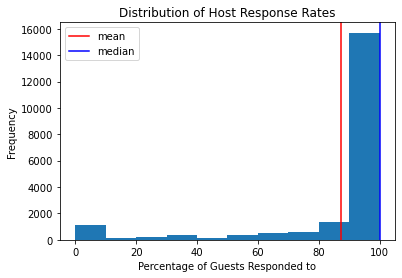

In [51]:
non_null_responses = df[df['host_response_rate'].isna()==False] # Getting rid of the null values
plt.figure()
plt.hist(non_null_responses['host_response_rate']) # Plotting the histogram
plt.axvline(non_null_responses['host_response_rate'].mean(), color='r', label='mean') # Display the mean

# Display the median
plt.axvline(non_null_responses['host_response_rate'].median(), color='b', label='median')

# Adding title and axis labels
plt.title('Distribution of Host Response Rates')
plt.ylabel('Frequency')
plt.xlabel('Percentage of Guests Responded to')
plt.legend()

plt.show()

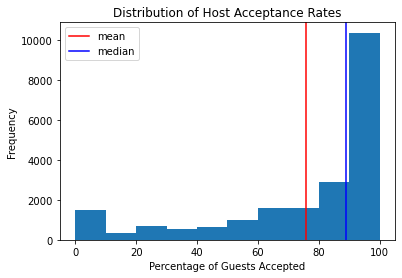

In [52]:
non_null_responses = df[df['host_acceptance_rate'].isna()==False] # Getting rid of the null values
plt.figure()
plt.hist(non_null_responses['host_acceptance_rate'])
plt.axvline(non_null_responses['host_acceptance_rate'].mean(), color='r', label='mean')
plt.axvline(non_null_responses['host_acceptance_rate'].median(), color='b', label='median')
plt.legend()
plt.title('Distribution of Host Acceptance Rates')
plt.ylabel('Frequency')
plt.xlabel('Percentage of Guests Accepted')

plt.show()

With the above information, we will drop `host_response_time` and impute both `host_response_rate` and `host_acceptance_rate` with the mean value

In [53]:
# dropping host_response_time
df.drop(columns ='host_response_time', inplace=True)

In [54]:
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean())
df['host_response_rate'] = df['host_response_rate'] / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'] / 100

df.isna().sum() / df.shape[0] * 100

id                                 0.000000
listing_url                        0.000000
last_scraped                       0.000000
name                               0.000000
description                        0.000000
neighborhood_overview              0.000000
picture_url                        0.000000
host_id                            0.000000
host_url                           0.000000
host_name                          0.000000
host_since                         0.000000
host_location                      0.000000
host_response_rate                 0.000000
host_acceptance_rate               0.000000
host_is_superhost                  0.000000
host_neighbourhood                 0.000000
host_total_listings_count          0.000000
host_verifications                 0.000000
host_has_profile_pic               0.000000
host_identity_verified             0.000000
neighbourhood_cleansed             0.000000
neighbourhood_group_cleansed       0.000000
latitude                        

Now let's look at the `bedrooms` column:

In [55]:
missing_value_look(df, 'bedrooms').sample(30)

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_has_bio
20331,31796259,https://www.airbnb.com/rooms/31796259,2021-09-02,Luxury Studio in Prime Area,If you're going to live in the best city in th...,"Centered near all the major subways, Freedom T...",https://a0.muscache.com/pictures/miso/Hosting-...,89896526,https://www.airbnb.com/users/show/89896526,Scott,2016-08-14,"Jersey City, New Jersey, United States",0.872499,0.758428,0.0,Financial District,1.0,"['email', 'phone', 'offline_government_id', 'g...",1.0,1.0,Financial District,Manhattan,40.71037,-74.00848,Entire rental unit,Entire home/apt,2,1.0,NaN,2.0,"[""Dedicated workspace"", ""Essentials"", ""Dryer"",...",$120.00,30,120,30.0,120.0,1,2,2,2,167,2021-09-02,2,0,0,2019-03-05,2020-01-17,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,1,0.07,0
27898,43731306,https://www.airbnb.com/rooms/43731306,2021-09-02,A+ Location Extended Stay Studio (2 Double beds),Our apartment is located in the center of Manh...,This is a very central location where you can ...,https://a0.muscache.com/pictures/3d04609c-8853...,348619646,https://www.airbnb.com/users/show/348619646,Nomad,2020-06-03,"New York, New York, United States",1.000000,0.980000,0.0,Midtown,50.0,"['email', 'phone', 'offline_government_id', 's...",1.0,1.0,Midtown,Manhattan,40.74654,-73.98709,Entire rental unit,Entire home/apt,6,1.0,NaN,3.0,"[""Heating"", ""TV"", ""Dedicated workspace"", ""Stov...",$273.00,1,1125,1.0,1125.0,1,26,56,86,86,2021-09-02,14,12,0,2020-07-21,2021-07-24,4.79,4.86,4.71,4.86,5.00,4.93,4.86,0,49,1.03,1
9753,13300059,https://www.airbnb.com/rooms/13300059,2021-09-02,Quiet Home Base for Exploring an Exciting City!,"A spacious, comfortable, private space in hist...",Prospect Park is a 10 minute walk away with bi...,https://a0.muscache.com/pictures/90497520-0161...,36478779,https://www.airbnb.com/users/show/36478779,Isa,2015-06-22,"Brooklyn, New York, United States",1.000000,0.960000,1.0,Lefferts Garden,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,Prospect-Lefferts Gardens,Brooklyn,40.66127,-73.95371,Entire guest suite,Entire home/apt,2,1.0,NaN,1.0,"[""Washer"", ""Hair dryer"", ""Cable TV"", ""Essentia...",$96.00,3,7,3.0,1125.0,1,0,5,10,40,2021-09-02,137,11,2,2016-12-09,2021-08-29,4.91,4.97,4.93,4.99,4.99,4.85,4.93,1,1,2.38,1
33296,49584878,https://www.airbnb.com/rooms/49584878,2021-09-02,Rear Facing XL Modern Studio Apartment,This AMAZING sun-filled studio apartment is lo...,none,https://a0.muscache.com/pictures/miso/Hosting-...,194142632,https://www.airbnb.com/users/show/194142632,Ori,2018-06-07,"New York, New York, United States",1.000000,0.970000,1.0,Hell's Kitchen,0.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,1.0,Hell's Kitchen,Manhattan,40.75568,-73.99695,Entire rental unit,Entire home/apt,2,1.0,NaN,0.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",$190.00,30,1125,30.0,1125.0,1,2,2,16,106,2021-09-02,1,1,1,2021-08-15,2021-08-15,5.00,5.00,5.00,5.00,5.00,4.00,4.00,1,7,1.00,0
34183,50288716,https://www.airbnb.com/rooms/50288716,2021-09-02,TRYP by Wyndham -Times Square/Hudson yard- sle...,"TRYP B

We might be able to impute the bedrooms column with the `property_type` or the `room_type` columns. 

In [56]:
missing_value_look(df, 'bedrooms')['room_type'].value_counts()

Entire home/apt    3198
Private room        542
Hotel room           14
Name: room_type, dtype: int64

In [57]:
missing_value_look(df, 'bedrooms')['property_type'].value_counts()

Entire rental unit                     2714
Private room in rental unit             178
Room in hotel                           158
Entire condominium (condo)              107
Entire loft                             106
Room in boutique hotel                   97
Entire serviced apartment                63
Entire residential home                  57
Entire guest suite                       56
Private room in residential home         42
Room in aparthotel                       26
Entire townhouse                         24
Private room in guest suite              18
Entire place                             17
Private room in townhouse                16
Private room in resort                   11
Room in serviced apartment               11
Private room in condominium (condo)       9
Entire guesthouse                         8
Private room in loft                      7
Entire bungalow                           5
Camper/RV                                 4
Private room in serviced apartme

In [58]:
missing_value_look(df, 'beds')

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_has_bio
168,68253,https://www.airbnb.com/rooms/68253,2021-09-02,Room in the heart of Astoria,<b>The space</b><br />This is a room in a 3 be...,none,https://a0.muscache.com/pictures/61b296eb-2adc...,67730,https://www.airbnb.com/users/show/67730,Boris,2010-01-04,"New York, New York, United States",0.872499,0.758428,0.0,Astoria,0.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,1.0,Astoria,Queens,40.763360,-73.920990,Private room in rental unit,Private room,1,1.0,1.0,NaN,"[""Long term stays allowed""]",$55.00,30,730,30.0,730.0,0,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,1
650,468613,https://www.airbnb.com/rooms/468613,2021-09-02,$1300 5/14 - 6/1 - 3 weeks - room f,<b>The space</b><br />Great room in incredible...,none,https://a0.muscache.com/pictures/5514600/8f890...,2325861,https://www.airbnb.com/users/show/2325861,Cynthia,2012-05-08,"New York, New York, United States",0.872499,0.758428,0.0,Lower East Side,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1.0,1.0,Lower East Side,Manhattan,40.721520,-73.992790,Private room in rental unit,Private room,1,1.0,1.0,NaN,"[""Long term stays allowed""]","$1,300.00",30,1125,30.0,1125.0,0,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,0
681,499249,https://www.airbnb.com/rooms/499249,2021-09-02,"WILLIAMSBURG FOR 25 DAYS, CHEAP!",<b>The space</b><br />I'm going to be out of B...,none,https://a0.muscache.com/pictures/5959676/1ec0f...,2463894,https://www.airbnb.com/users/show/2463894,Alex,2012-05-25,"Brooklyn, NY",0.872499,0.758428,0.0,South Williamsburg,1.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,Williamsburg,Brooklyn,40.705280,-73.957560,Private room in rental unit,Private room,1,1.0,1.0,NaN,"[""Long term stays allowed""]",$190.00,30,218,30.0,218.0,0,0,0,0,0,2021-09-02,1,0,0,2012-06-28,2012-06-28,0.0,5.0,4.0,5.0,5.0,5.0,5.0,0,1,0.01,0
693,505231,https://www.airbnb.com/rooms/505231,2021-09-02,"Enjoy a 1 Bedroom to share, NYC",<b>The space</b><br />Rental female only. <br ...,none,https://a0.muscache.com/pictures/6044146/40469...,2490915,https://www.airbnb.com/users/show/2490915,Catherine,2012-05-29,"New York, New York, United States",0.872499,0.758428,0.0,Yorkville,1.0,"['email', 'phone', 'reviews']",1.0,0.0,Upper East Side,Manhattan,40.779680,-73.951970,Private room in rental unit,Private room,1,1.0,1.0,NaN,"[""Long term stays allowed""]",$80.00,30,60,30.0,60.0,1,0,0,0,0,2021-09-02,1,0,0,2012-06-22,2012-06-22,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0,1,0.01,1
717,527237,https://www.airbnb.com/rooms/527237,2021-09-02,Gorgeous pvt room in West Village,<b>The space</b><br />I'm subletting a private...,none,https://a0.muscache.com/pictures/6358887/83255...,2591015,https://www.airbnb.com/users/show/2591015,Cristina,2012-06-09,"New York, New York, United States",1.000000,0.000000,0.0,West Village,1.0,"['email', 'phone']",1.0,0.0,West Village,Manhattan,40.736630,-74.004120,Private room in rental unit,Private room,1,1.0,1.0,NaN,"[""Long term stays allowed""]",$80.00,3,1125,3.0,1125.0,1,0,0,1,66,2

Here we will impute the `NaN` values in `bedrooms` with the values from `beds`

In [59]:
df.isna().sum()

id                                   0
listing_url                          0
last_scraped                         0
name                                 0
description                          0
neighborhood_overview                0
picture_url                          0
host_id                              0
host_url                             0
host_name                            0
host_since                           0
host_location                        0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_neighbourhood                   0
host_total_listings_count            0
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                

In [60]:
df['bedrooms'] = df.groupby('beds')['bedrooms'].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [61]:
df.isna().sum()

id                                   0
listing_url                          0
last_scraped                         0
name                                 0
description                          0
neighborhood_overview                0
picture_url                          0
host_id                              0
host_url                             0
host_name                            0
host_since                           0
host_location                        0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_neighbourhood                   0
host_total_listings_count            0
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                

And now we can drop the rows in `bedrooms` and `beds` that are missing values.

In [62]:
df = df.dropna(subset='beds')
df.isna().sum()

id                                   0
listing_url                          0
last_scraped                         0
name                                 0
description                          0
neighborhood_overview                0
picture_url                          0
host_id                              0
host_url                             0
host_name                            0
host_since                           0
host_location                        0
host_response_rate                   0
host_acceptance_rate                 0
host_is_superhost                    0
host_neighbourhood                   0
host_total_listings_count            0
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                

In [63]:
missing_value_look(df, 'first_review').sample(3)

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_has_bio
28859,45329984,https://www.airbnb.com/rooms/45329984,2021-09-02,Private Room in Murray Hill Apartment,"Full room in a 2 bedroom, 1 bathroom shared ho...",Welcome to Murray Hill – a neighborhood on the...,https://a0.muscache.com/pictures/1a8de85a-1f96...,305240193,https://www.airbnb.com/users/show/305240193,June,2019-10-29,"New York, New York, United States",0.970000,0.250000,0.0,Crown Heights,219.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,1.0,Kips Bay,Manhattan,40.74338,-73.97765,Private room in rental unit,Private room,1,1.0,1.0,1.0,"[""Dedicated workspace"", ""Microwave"", ""Dishes a...",$84.00,30,180,30.0,180.0,1,0,7,37,312,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,307,NaN,1
25932,41196473,https://www.airbnb.com/rooms/41196473,2021-09-02,Entire Apartment in Lincoln Square,Very nice apartment overlooking the Hudson Riv...,Lincoln Square is a nice place to stay. 10 min...,https://a0.muscache.com/pictures/c9b49888-ab4c...,194737424,https://www.airbnb.com/users/show/194737424,Joey,2018-06-10,"New York, New York, United States",0.872499,0.758428,0.0,Upper West Side,0.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,1.0,Upper West Side,Manhattan,40.77646,-73.98992,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Dishes and silverware"", ""Cooking basics"", ""L...",$85.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,1
31618,48132627,https://www.airbnb.com/rooms/48132627,2021-09-02,Just Renovated Room in Bushwick Location,"Full room in a 6 bedroom, 3 bathroom shared ho...",none,https://a0.muscache.com/pictures/miso/Hosting-...,305240193,https://www.airbnb.com/users/show/305240193,June,2019-10-29,"New York, New York, United States",0.970000,0.250000,0.0,Crown Heights,219.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,1.0,Bushwick,Brooklyn,40.69598,-73.91373,Private room in rental unit,Private room,1,3.0,1.0,1.0,"[""Dedicated workspace"", ""Washer"", ""Oven"", ""Ess...",$51.00,30,180,30.0,180.0,1,0,0,13,288,2021-09-02,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,307,NaN,1


These missing review dates indicate that at the time of scraping this web data, these hosts had no reviews. One of our main business questions is what determines whether a host gets a good review or not. Unfortunately, we will need to remove these rows that have no reviews.

In [64]:
df = df.dropna(subset = ['first_review', 'last_review'])
df.isna().sum()

id                                  0
listing_url                         0
last_scraped                        0
name                                0
description                         0
neighborhood_overview               0
picture_url                         0
host_id                             0
host_url                            0
host_name                           0
host_since                          0
host_location                       0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_neighbourhood                  0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates

In [65]:
df.shape

(26782, 58)

In [66]:
missing_value_look(df, 'review_scores_value').sample(3)

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,num_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,host_has_bio
7675,9896731,https://www.airbnb.com/rooms/9896731,2021-09-02,BEDROOM IN UWS,Charming and confortable bedroom in UWS 118th ...,none,https://a0.muscache.com/pictures/24eac8de-323c...,50448556,https://www.airbnb.com/users/show/50448556,Miguel,2015-12-03,"New York, New York, United States",0.872499,0.758428,0.0,Harlem,5.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,1.0,Harlem,Manhattan,40.80351,-73.95086,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Kitchen"", ""Heating"", ""Wifi"", ""Iron"", ""Essent...",$109.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,1,0,0,2015-12-09,2015-12-09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,5,0.01,0
7432,9728168,https://www.airbnb.com/rooms/9728168,2021-09-02,*Manhattan Luxury Apt - Walk to TSQ,This is a great opportunity to live in a super...,This apartment is on the edge between Midtown ...,https://a0.muscache.com/pictures/ada57cd9-8838...,5124437,https://www.airbnb.com/users/show/5124437,Anna,2013-02-17,"Greater London, England, United Kingdom",0.872499,0.758428,0.0,Hell's Kitchen,1.0,"['email', 'phone', 'facebook', 'reviews']",1.0,0.0,Hell's Kitchen,Manhattan,40.75990,-73.99754,Entire rental unit,Entire home/apt,4,1.0,1.0,2.0,"[""Kitchen"", ""Hot tub"", ""Washer"", ""Heating"", ""S...",$189.00,30,1125,30.0,1125.0,1,0,0,0,0,2021-09-02,4,0,0,2015-12-10,2015-12-15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.06,1
2328,2532068,https://www.airbnb.com/rooms/2532068,2021-09-02,Beautiful Prewar UWS Apartment,Beautiful one bedroom available in a two bedro...,none,https://a0.muscache.com/pictures/66860336/7ebc...,12967572,https://www.airbnb.com/users/show/12967572,Laura,2014-03-09,"New York, New York, United States",0.872499,0.758428,0.0,Upper West Side,1.0,"['email', 'phone', 'kba']",1.0,0.0,Upper West Side,Manhattan,40.77929,-73.97787,Private room in rental unit,Private room,1,1.0,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Heating"", ""Air con...",$65.00,30,1125,30.0,1125.0,0,0,0,0,0,2021-09-02,1,0,0,2015-09-01,2015-09-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.01,1


For the rest of the columns with null values, we will drop these listings as well. These columns also could influence our target column which is `review_scores_rating`. They will be removed in the preprocessing step however.

In [67]:
df = df.dropna(subset = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication', 
                        'review_scores_location', 'review_scores_value'])
df.isna().sum()

id                                0
listing_url                       0
last_scraped                      0
name                              0
description                       0
neighborhood_overview             0
picture_url                       0
host_id                           0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
num_bathrooms               

The below cell is a checkpoint that raises an error if nulls still exist in the dataset.

In [68]:
if df.isna().sum().sum() != 0:
    raise Exception('Oops! There are still some nulls in your data') # Raises an error if the condition is satisfied


In [69]:
df.shape

(26175, 58)

Woohoo! We have rid our dataset of all null values. Now onto the data formatting. Let's look at the datatypes for each column again.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26175 entries, 0 to 36854
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              26175 non-null  int64         
 1   listing_url                     26175 non-null  object        
 2   last_scraped                    26175 non-null  datetime64[ns]
 3   name                            26175 non-null  object        
 4   description                     26175 non-null  object        
 5   neighborhood_overview           26175 non-null  object        
 6   picture_url                     26175 non-null  object        
 7   host_id                         26175 non-null  int64         
 8   host_url                        26175 non-null  object        
 9   host_name                       26175 non-null  object        
 10  host_since                      26175 non-null  object        
 11  ho

A couple things stand out:


- `host_since` should be a datetime 
- `neighbourhood_group_cleansed` could have its name changed to something like `borough`
- `price` should be either an `int` or a `float` type
- We can remove `minimum_nights_average_ntm` and `maximum_nights_average_ntm`

After these tasks are completed, we should be able to move to EDA.

In [71]:
df['host_since'] = pd.to_datetime(df['host_since']) # Converting to a datetime type
df.rename({'neighbourhood_group_cleansed': 'borough', 'neighbourhood_cleansed': 'neighborhood', 
          'neighborhood_overview': 'neighborhood_description', 
           'calculated_host_listing_count': 'host_total_listings'}, inplace=True, axis=1) # renaming columns

# Getting rid of extra characters in the price column and converting to a numeric type
df['price'] = df['price'].str.replace('$', '') 
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)


/var/folders/fy/9mbkzf_90pxdhyqvqzzqf5h40000gn/T/ipykernel_5469/4008989747.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


We can also drop the columns `minimum_nights_avg_ntm` and `maximum_nights_avg_ntm` as they are redundant information.

In [72]:
df.drop(columns=['minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26175 entries, 0 to 36854
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              26175 non-null  int64         
 1   listing_url                     26175 non-null  object        
 2   last_scraped                    26175 non-null  datetime64[ns]
 3   name                            26175 non-null  object        
 4   description                     26175 non-null  object        
 5   neighborhood_description        26175 non-null  object        
 6   picture_url                     26175 non-null  object        
 7   host_id                         26175 non-null  int64         
 8   host_url                        26175 non-null  object        
 9   host_name                       26175 non-null  object        
 10  host_since                      26175 non-null  datetime64[ns]
 11  ho

In [74]:
df.isna().sum()

id                                0
listing_url                       0
last_scraped                      0
name                              0
description                       0
neighborhood_description          0
picture_url                       0
host_id                           0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighborhood                      0
borough                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
num_bathrooms               

Now all of our data is fully cleaned. Next we will export this to a `.csv` file that will then be used for data preprocessing for our machine learning models.

In [75]:
df.to_csv('clean_data/nyc_sept2021_clean.csv') # Exports data to a clean_data folder